# Unstructured Data Analytics HW1

Name: Mohammad Manzoor Hassan Mirza
 
Andrew ID: mmmirza

Collaborators (if none, say "none"; do *not* leave this blank): none

Reminder: you should not be sharing code.

**Warning: make sure your compute environment is set up first.** This homework assignment assumes that you have already installed Anaconda Python 3 and spaCy. Instructions for installing these are part of the tutorial [here](https://www.andrew.cmu.edu/user/georgech/95-865/Anaconda,%20Jupyter,%20and%20spaCy%20setup%20tutorial.pdf).

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).

### [Problem 1] Basic Text Analysis [45 pts]

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Note: Please *do not* change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will not receive points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

```python
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
```

**(a) Warm-up/basic Python review [15 pts across subparts].** This part serves as a warm-up, getting you familiar with the kind of code we will be writing in this class. Note that throughout part (a), your code should **not** be using spaCy.

**Subpart i [5 pts].** Write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).

**Please do not actually print out the contents of each book since many of the books are extremely long, and by printing out all the books' contents, you'll end up creating a Jupyter notebook that has a massive file size.**

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

Your output should look like (although there should be 100 books rather than 3 as shown below; also, the ordering of the books might be different on your machine):

```
./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
```

In [1]:
# import required module
import os

# setting the path to the folder containing all files
path = './HW1_Dataset/'

# iterate over files in that path
for filename in os.listdir(path):
    # setting the path to a specific file as a string
    path_file = os.path.join(path, filename)
    # opening a specific file f 
    with open(path_file, encoding = 'utf8') as f:
    # reading the file in as a string
        data = f.read()
    print(path_file, len(data))

./HW1_Dataset/A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (265).txt 177758
./HW1_Dataset/A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt 765918
./HW1_Dataset/A Modest Proposal by Jonathan Swift (233).txt 38966
./HW1_Dataset/A Study in Scarlet by Arthur Conan Doyle (163).txt 262340
./HW1_Dataset/A Tale of Two Cities by Charles Dickens (425).txt 776702
./HW1_Dataset/Adventures of Huckleberry Finn by Mark Twain (401).txt 593962
./HW1_Dataset/Alice in Wonderland by Lewis Carroll and Alice Gerstenberg (126).txt 104079
./HW1_Dataset/Alice's Adventures in Wonderland by Lewis Carroll (564).txt 163817
./HW1_Dataset/Anne of Green Gables by L. M.  Montgomery (114).txt 580635
./HW1_Dataset/Autobiography of Benjamin Franklin by Benjamin Franklin (247).txt 458600
./HW1_Dataset/Beowulf An Anglo-Saxon Epic Poem (403).txt 292953
./HW1_Dataset/Beyond Good and Evil by Friedrich Wilhelm Nietzsche (120).txt 402273
./HW1_Dataset/Candide by Voltaire (1

**Subpart ii [5 pts].** Copy and paste your code from **subpart i** into the code cell below. Then in the code cell below, modify the code so that it prints out the top 15 longest books (in terms of raw string length, which is what you had already computed). In particular, please write your code so that the printout is of the following format:

```
1. <number of characters in longest text file> <filename of longest text file>
2. <number of characters in 2nd longest text file> <filename of 2nd longest text file>
...
15. <number of characters in 15th longest text file> <filename of 15th longest text file>
```

Note: only print out information for the top 15 books in the format above; please do not repeat printing what we asked you to print in **subpart i**.

In [5]:
# creating an empty dictionary with filename as key and # of string characters as value
dict_comb = {}

# iterate over files in that path
for filename in os.listdir(path):
    # setting the path to a specific file as a string
    path_file = os.path.join(path, filename)
    # opening a specific file f
    with open(path_file, encoding = 'utf-8') as f:
    # reading the file in as a string
        data = f.read()
    dict_comb[path_file] = len(data)

# sorting the dictionary based on values in a descending order
sorted_dict_comb = {key: value for key, value in sorted(dict_comb.items(), reverse = True, key = lambda item:item[1])}

# saving the dictionary as a list of tuples
first_15 = list(sorted_dict_comb.items())[:15]

# printing the length of the longest 15 files and their filenames
for i in range(len(first_15)):
    print(str(i + 1) + '.', first_15[i][1], first_15[i][0])

1. 5465100 ./HW1_Dataset/The Complete Works of William Shakespeare by William Shakespeare (132).txt
2. 4351846 ./HW1_Dataset/The King James Version of the Bible (132).txt
3. 3254333 ./HW1_Dataset/Les Mise╠ürables by Victor Hugo (165) (Unicode Encoding Conflict).txt
4. 3227580 ./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt
5. 3033575 ./HW1_Dataset/Essays of Michel de Montaigne ΓÇö Complete by Michel de Montaigne (205).txt
6. 2643849 ./HW1_Dataset/The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt
7. 1534140 ./HW1_Dataset/Ulysses by James Joyce (282).txt
8. 1378627 ./HW1_Dataset/My Secret Life, Volumes I. to III. by Anonymous (157).txt
9. 1238569 ./HW1_Dataset/Moby Dick; Or, The Whale by Herman Melville (413).txt
10. 1231784 ./HW1_Dataset/Leviathan by Thomas Hobbes (417).txt
11. 1214387 ./HW1_Dataset/The Republic by Plato (246).txt
12. 1200021 ./HW1_Dataset/The History of the Peloponnesian War by Thucydides (122).txt
13. 1175588 ./HW1_Dataset/The Iliad by Home

**Subpart iii [5 pts].** You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that later on in the course, we shall see that chopping up large amounts of data into small pieces or "batches" is in fact quite common in machine learning since for massive datasets, we often cannot store them in their entirety on a CPU or GPU for processing all at once.

As a toy example, suppose that a book's text is `'cat dog shark spam eggs'` and we want to split it up into batches where each batch has at most 3 words. Then we could split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.

We have provided code for you to do this below.

In [6]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


Now write a loop that goes through all 100 books again. However, for each book, split it up into batches so that each batch has at most 10000 words. In this case, how many batches are there total across all 100 books? Please write code that computes this number of batches. Your code should print out the following (with the correct total number of batches):

```
Total number of batches: <total number of batches across all 100 books>
```

In [8]:
# a list of sub-lists where each sub-list contains the batches for a book
all_books = []

# iterate over files in that path
for filename in os.listdir(path):
    # setting the path to a specific file as a string
    path_file = os.path.join(path, filename)
    # opening a specific file f 
    with open(path_file, encoding = 'utf-8') as f:
    # reading the file in as a string
        data = f.read()
    # setting a new variable name to store batches for each book
    batches = split_into_batches(data, 10000)
    all_books.append(batches)
    
# verifying the number of words in the first batch of the first book by splitting that batch i.e. a string into words
# print(len(all_books[0][0].split(' ')))
    
# setting the base variable to count the number of batches across all 100 books
total_batches = 0

# looping through each sub_list i.e. batches for each book
for i in all_books:
    total_batches += len(i)

print ('Total number of batches: ', total_batches)

Total number of batches:  1246


**(b) [10 pts]** Now we will finally use spaCy. Note that for this problem, you don't actually need `spaCy`'s named entity recognition or grammatical parsing. Turning these elements off when you instantiate the `nlp` object can substantially speed up your code. To make sure these are off when instantiating the `nlp` object, call: 

```python
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
```

**Throughout this problem, do not remove stopwords.**

Build a term frequency (raw counts) table that is for all 100 books. Specifically, building on your solution to part (a)-subpart iii, read in a single book at a time and for each book, do the following:

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--do not do any division.) Also, as we explain below, we will only count lemmas that are alphanumeric.

Note that just as we had said in part (a): do **not** print out the complete contents of every book since doing so will result in a Jupyter notebook file that is massive.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the lemmas, only include lemmas that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

```python
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
```

In [12]:
# import relevant libraries
import spacy
import regex as re
from collections import Counter

# turning off entity recognition and grammatical parsing while loading spacy
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

# counter dictionary, with the key as the word and the value as the frequency count
histogram = Counter()

# iterate over files in that path
for filename in os.listdir(path): 
    # setting the path to a specific file as a string
    path_file = os.path.join(path, filename)
    # opening a specific file f 
    with open(path_file, encoding = 'utf-8') as f:
    # read the file in as a string
        data = f.read()
    # setting a new variable name to store batches for each book
    batches = split_into_batches(data, 10000)
    # processing each batch separately
    for batch in batches:
        # tokenization i.e. separation of words
        parsed_text = nlp(batch)
        # looping through each token in the parsed_text object
        for token in parsed_text:
            # lemmatizing the words i.e. finding their basic representation (lower case)
            lemma = token.lemma_
            # filtering only lemmas that consist of alphabetic letters
            if re.match('[a-zA-Z]+$', lemma):
            # adding it in the dictionary i.e. histogram 
                histogram[lemma] += 1

# getting the most common lemmas in the histogram
sorted_lemma_count_pairs = histogram.most_common()
    
# printing the top 50 items from the list of tuples i.e. sorted_lemma_count_pairs
print('{:<10s}{:<10s}{:<10s}'.format('Rank', 'Lemma', 'Count'))
for rank, value in enumerate(sorted_lemma_count_pairs[:50]):
    print('{:<10s}{:<10s}{:<10}'.format(str(rank + 1), value[0], value[1])) 

Rank      Lemma     Count     
1         the       702301    
2         be        436045    
3         and       435432    
4         of        386343    
5         to        324345    
6         I         254952    
7         a         232719    
8         in        204234    
9         he        193507    
10        that      158935    
11        have      158148    
12        it        135414    
13        not       112312    
14        his       108537    
15        you       105094    
16        with      101226    
17        they      96202     
18        for       95261     
19        as        90714     
20        she       78940     
21        but       75598     
22        my        74019     
23        do        68716     
24        at        64947     
25        on        62798     
26        this      61222     
27        by        61168     
28        we        60268     
29        which     58727     
30        all       58724     
31        say       58281     
32      

**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

Text(0, 0.5, 'Raw count')

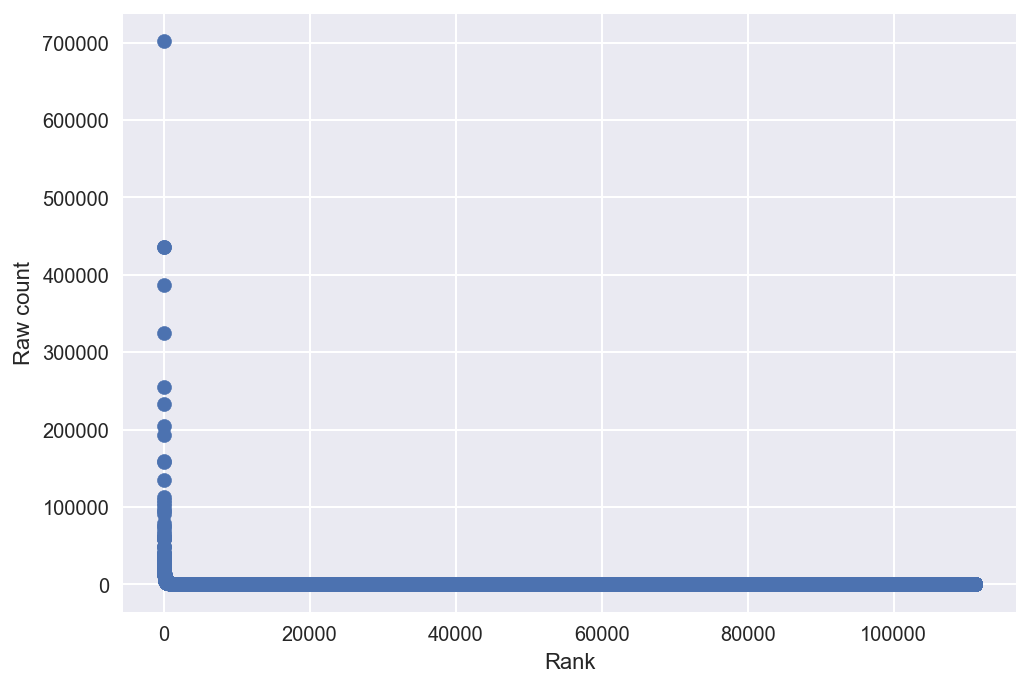

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

# extracting the counts for each lemma
counts = [count for lemma, count in sorted_lemma_count_pairs]
# plotting the counts for each lemma along with their rank
plt.scatter(range(1, len(counts) + 1), counts)
plt.xlabel('Rank')
plt.ylabel('Raw count')

Text(0, 0.5, 'Raw count')

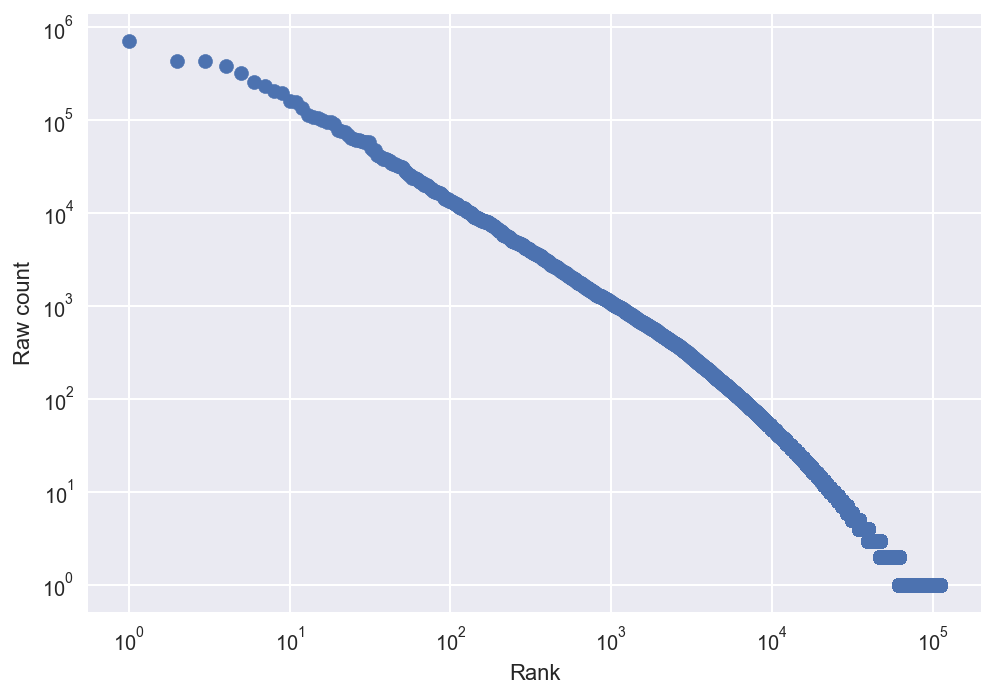

In [14]:
# Log-log plot

# plotting the counts for each lemma along with their rank
plt.scatter(range(1, len(counts) + 1), counts)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Rank')
plt.ylabel('Raw count')

**(d) [10 pts across subparts]** Let's now try to make sense of the very last plot in part **(c)**. Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.

Please answer the following questions:

**Subpart i [3 pts].** What do you observe in the log-log plot above? Is this consist with the power law?

The log-log plot is consistent with the power law, which states that one quantity varies as a power of another i.e. rank and raw count. The negative slope i.e. -c stays constant in the plot and corroborates the power law equation given above. 

**Subpart ii [4 pts].** Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words; thus what remains in the bag are actually alphanumeric lemmas). What is the probability of drawing one of the 4 most frequent alphanumeric lemmas? What is the probability of drawing one of the 50 most frequent alphanumeric lemmas? Answer these two questions using code rather than just entering in the final answers as numbers.

In [15]:
# sum of the individual count of all lemmas (across all textbooks)
denominator = 0
for tup in sorted_lemma_count_pairs:
    denominator += tup[1]

# sum of the individual count of the top 4 most frequently occuring lemmas (across all textbooks)
numerator = 0
for tup in sorted_lemma_count_pairs[:4]:
    numerator += tup[1]

print('Probability of drawing one of the 4 most frequent alphanumeric lemmas: ', round(numerator/denominator, 3))

# sum of the individual count of the top 50 most frequently occuring lemmas (across all textbooks)
numerator = 0
for tup in sorted_lemma_count_pairs[:50]:
    numerator += tup[1]

print('Probability of drawing one of the 50 most frequent alphanumeric lemmas: ', round(numerator/denominator, 3))

Probability of drawing one of the 4 most frequent alphanumeric lemmas:  0.162
Probability of drawing one of the 50 most frequent alphanumeric lemmas:  0.483


**Subpart iii [4 pts].** What proportion of the alphanumeric lemmas occur only once? What proportion of the alphanumeric lemmas occur fewer than 10 times?

In [16]:
# finding the total number of lemmas (across all books)
denominator = len(sorted_lemma_count_pairs)

# counting the number of lemmas that appear only once
once = 0
for tup in sorted_lemma_count_pairs:
    if tup[1] == 1:
        once += 1

print("Occur only once: ", round(once/denominator, 3))

# counting the number of lemmas that appear less than ten times
fewer_than_ten = 0
for tup in sorted_lemma_count_pairs:
    if tup[1] <= 10:
        fewer_than_ten += 1

print("Occur fewer than 10 times: ", round(fewer_than_ten/denominator, 3))

Occur only once:  0.447
Occur fewer than 10 times:  0.793


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

```python
import nltk
nltk.download('reuters')
```

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing. Hence, you will want to instantiate the nlp object by calling:

```python
nlp = spacy.load('en_core_web_sm', disable=['parser'])
```


**(a) [15 pts]** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [ ]:
# installing the reuters dataset
import nltk
nltk.download('reuters')

C:\Users\Dell\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Text(0, 0.5, 'Raw Count')

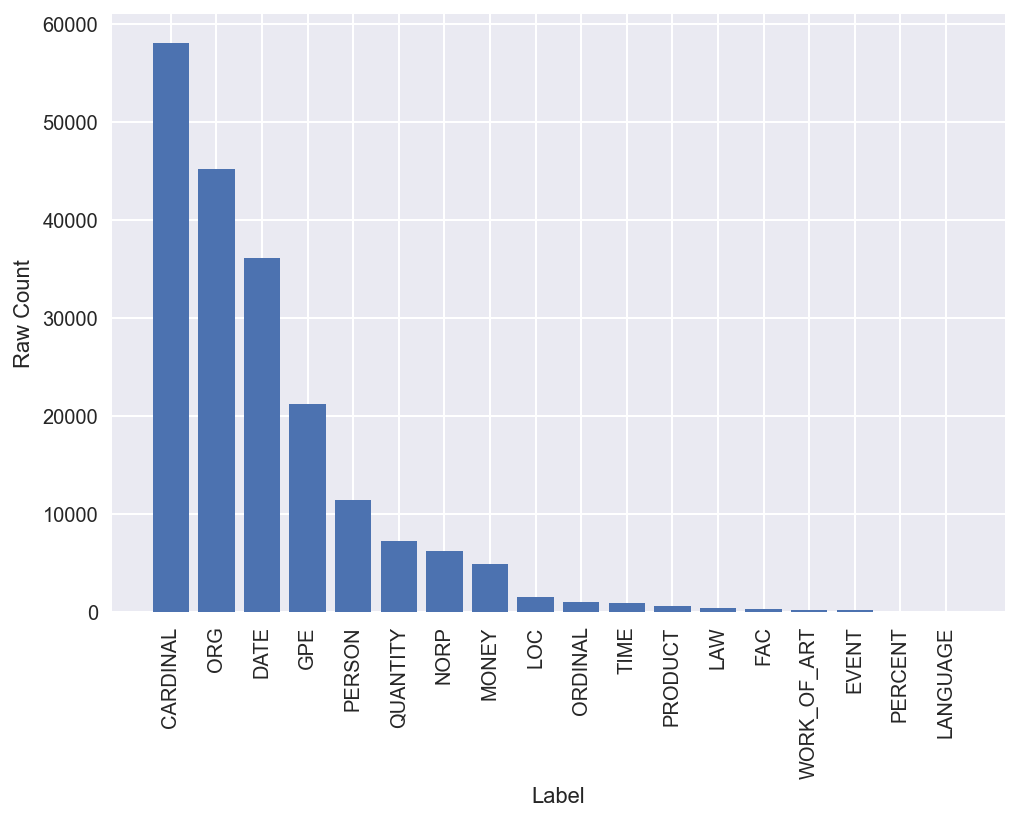

In [17]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

# since each article has been parsed in as text (nlp object) and stored in the list reuters_nlp
# we loop through each parsed text and each named entity in an article, to store its label in the dictionary
for article in reuters_nlp:
    for entity in article.ents:
        label_counter[entity.label_] +=1

# getting the most common labels in the label_counter
sorted_label_count_pairs = label_counter.most_common()

# extracting the counts for each label
counts = [count for label, count in sorted_label_count_pairs]
# extracting the labels
labels = [label for label, count in sorted_label_count_pairs]

# setting the number of bars to the length of counts, plotting the counts variable  
plt.bar(range(len(counts)), counts)

plt.xticks(range(len(labels)), labels, rotation = 90)
plt.xlabel('Label')
plt.ylabel('Raw Count')

**(b) [15 pts]** Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively. **In both cases, please convert the entity names to lowercase first before computing the top 10.**

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [18]:
entity_counter_ORG = Counter()
entity_counter_GPE = Counter()

for article in reuters_nlp:
    # for each article, storing an entity with ORG and GPE label in the relevant list below 
    ORG = []
    GPE = []
    
    for entity in article.ents:        
        # appending the lemma representation of each entity to the list
        if entity.label_ == 'ORG':
            ORG.append(entity.lemma_)
        elif entity.label_ == 'GPE':
            GPE.append(entity.lemma_)
        
    # converting the list ORG and GPE to a set to remove duplicates of entity.lemma_ since we are only checking for 
    # presence of an entity in a document and not its frequency of occurrences
    
    # updating the count for a each lemma if the list ORG/GPE has a single occurrence of the relevant entity
    entity_counter_ORG.update(set(ORG))
    entity_counter_GPE.update(set(GPE))

# getting the most common entities in the entity_counter
sorted_entity_count_ORG = entity_counter_ORG.most_common(10)
sorted_entity_count_GPE = entity_counter_GPE.most_common(10)

# printing the top 10 items from the list of tuples i.e. (entity, count)
print ('\nTop 10 Most Frequently Occuring Entities with ORG Label')
for entity, count in sorted_entity_count_ORG:
    print(entity, ":", count)

# printing the top 10 items from the list of tuples i.e. (entity, count)
print ('\nTop 10 Most Frequently Occuring Entities with GPE Label')
for entity, count in sorted_entity_count_GPE:
    print(entity, ":", count)


Top 10 Most Frequently Occuring Entities with ORG Label
reuters : 447
the securities and exchange commission : 249
ec : 237
treasury : 222
fed : 209
usda : 181
the u.s. agriculture department : 168
the bank of england : 142
congress : 136
opec : 125

Top 10 Most Frequently Occuring Entities with GPE Label
u.s. : 1674
japan : 575
the united states : 381
u.k. : 305
canada : 304
new york : 256
west germany : 237
washington : 233
london : 211
brazil : 195


**(c) [20 pts]** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? **Just like in the previous part, please convert entity names to lowercase in your analysis.**

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [19]:
# capturing the co-occurrence of a GPE labeled entity and OPEC
OPEC_GPE_cooccurrence = Counter()
# capturing the occurrence of a GPE labeled entity
GPE_occurrence = Counter()

# using list comprehension to loop through entities for each article
for article in reuters_nlp:
    # capturing all lemmas for each article with the following tags: ORG and GPE
    ORG = [entity.lemma_ for entity in article.ents if entity.label_ == 'ORG']
    GPE = [entity.lemma_ for entity in article.ents if entity.label_ == 'GPE']
    
    # set is needed to create/increment the counter for an entity by '1' if its present in the article 
    # instead of by its # of occurrences
    # updating the occurrence dictionary with list GPE 
    GPE_occurrence.update(set(GPE))
    # checking if 'OPEC' exists in the list for ORG labeled entities
    if 'opec' in ORG:
        # updating the co_occurrence dictionary with the entities labeled as GPE, that co-occur with OPEC
        OPEC_GPE_cooccurrence.update(set(GPE))

# empty dictionary to store the GPE entities and their associated ratio with OPEC        
ratio = {}

# calculating part of the PMI ratio (note that co-occurrence is a subset of occurrence)        
for entity, count in OPEC_GPE_cooccurrence.items():
    ratio[entity] = count/ GPE_occurrence[entity]

# sorting the ratios from highest to lowest (altenratively, can use itemgetter)
sorted_ratios = {entity: ratio for entity, ratio in sorted(ratio.items(), reverse = True, key=lambda item: item[1])}
    
# saving the first 50 items of the dictionary as a list of tuples
first_50 = list(sorted_ratios.items())[:50]

# printing output
print('{:<10s}{:<25s}{:<13s}'.format('Rank', 'Entity', 'Ratio'))
for i in range(len(first_50)):
    print('{:<10s}{:<25s}{:<13.3f}'.format(str(i + 1), first_50[i][0], first_50[i][1]))    


Rank      Entity                   Ratio        
1         lajous                   1.000        
2         duri                     1.000        
3         petromin                 1.000        
4         september norway's       1.000        
5         turben                   1.000        
6         emirates                 1.000        
7         the lake charles         1.000        
8         bethesda                 1.000        
9         east room                1.000        
10        rosenberg                1.000        
11        gabon                    1.000        
12        opecna                   1.000        
13        venezuela"s              1.000        
14        el salado                1.000        
15        yanbu                    1.000        
16        jubail                   1.000        
17        napo                     1.000        
18        napo province            1.000        
19        tripoli                  1.000        
20        saudi arab

Entities like Saudi Arabia, Qatar, Libya, Ecuador are in the top 50 highest ratios (calculated using a part of the PMI equation). This makes sense because these countries are part of the 15 members of OPEC. Vienna is also in the list above since OPEC is headquartered in this city, although Austria is not a member state. However, some entities such as New York Harbor and Jakarta do not make sense since they are not OPEC member states and should ideally not have high co-occurrence. Nonetheless, they co-occur with OPEC possibly because these countries import oil from member states. Moreover, this ratio to arrange most frequently co-occuring entities with OPEC can be an erroneous metric since entities with low occurrence may end up having higher ratios if they co-occur with OPEC. 

### [Problem 3] Questionnaire [5 pts]

Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://forms.gle/ojrc5eWcm7gDnN8L7